In [33]:
import pandas as pd
import numpy as np
import pandas as pd

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Column names
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# View the first few rows
df


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [34]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [35]:
df.shape

(150, 5)

In [36]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
class,0


In [37]:
from sklearn.preprocessing import LabelEncoder

# Assuming df['class'] contains the class labels
label_encoder = LabelEncoder()
df['class_encoded'] = label_encoder.fit_transform(df['class'])

# View the first few rows to see the encoded labels
df[['class', 'class_encoded']].head()


,class,class_encoded
0,Iris-setosa,0
1,Iris-setosa,0
2,Iris-setosa,0
3,Iris-setosa,0
4,Iris-setosa,0


In [38]:
df[['class','class_encoded']]

,class,class_encoded
0,Iris-setosa,0
1,Iris-setosa,0
2,Iris-setosa,0
3,Iris-setosa,0
4,Iris-setosa,0
...,...,...
145,Iris-virginica,2
146,Iris-virginica,2
147,Iris-virginica,2
148,Iris-virginica,2


In [39]:
# Selecting rows where class_encoded is equal to 1
filtered_df = df[df['class_encoded'] == 1]

# Display the filtered DataFrame
filtered_df[['class', 'class_encoded']]


,class,class_encoded
50,Iris-versicolor,1
51,Iris-versicolor,1
52,Iris-versicolor,1
53,Iris-versicolor,1
54,Iris-versicolor,1
55,Iris-versicolor,1
56,Iris-versicolor,1
57,Iris-versicolor,1
58,Iris-versicolor,1
59,Iris-versicolor,1


In [43]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['class','class_encoded'])
y=df['class_encoded']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [44]:
model.score(X_test,y_test)

1.0

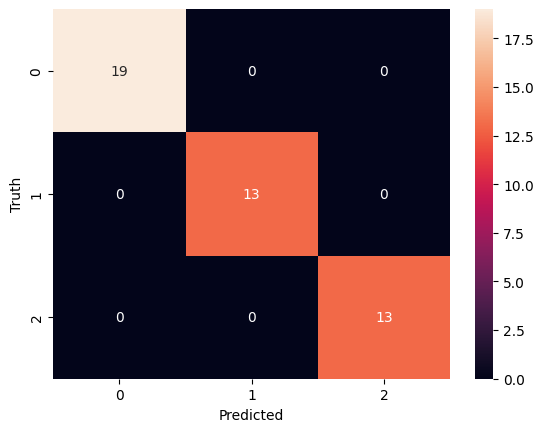

1.0


In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
cm=confusion_matrix(y_test,model.predict(X_test))
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print(accuracy_score(y_test,model.predict(X_test)))